In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

In [2]:
df=pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [6]:
#cleaning
df.drop(columns=['Email No.'], inplace=True)

In [7]:
df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [8]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [9]:
X=df.iloc[:, :df.shape[1]-1]
#Independent Variables
y=df.iloc[:, -1]
#Dependent Variable
X.shape, y.shape

((5172, 3000), (5172,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Fit and predict on each mode 

In [21]:
model = { "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2), 
         "Linear SVM":LinearSVC(random_state=8, max_iter=900000), 
         "Polynomical SVM":SVC(kernel="poly", degree=2, random_state=8), 
         "RBF SVM":SVC(kernel="rbf", random_state=8), 
         "Sigmoid SVM":SVC(kernel="sigmoid", random_state=8) }

In [22]:
for model_name, model in models.items():
    # Fit the model and make predictions
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # Calculate accuracy score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Print the accuracy score
    print(f"Accuracy for {model_name} model: {accuracy}")

Accuracy for K-Nearest Neighbors model: 0.8737113402061856


C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy for Linear SVM model: 0.9626288659793815
Accuracy for Polynomical SVM model: 0.7731958762886598
Accuracy for RBF SVM model: 0.8324742268041238
Accuracy for Sigmoid SVM model: 0.6211340206185567



Spam emails: 92
Non-spam emails: 5080
Total emails: 5172


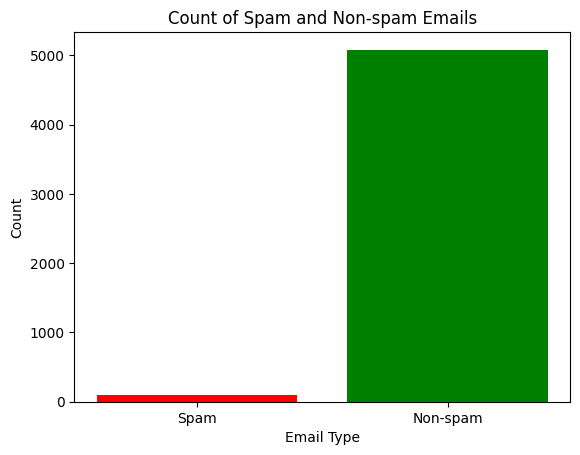

In [23]:
spam_count = sum(df['spam'])
non_spam_count = len(df) - spam_count
total_emails = len(df)
print("\nSpam emails:", spam_count)
print("Non-spam emails:", non_spam_count)
print("Total emails:", total_emails)

categories = ['Spam', 'Non-spam']
counts = [spam_count, non_spam_count]

plt.bar(categories, counts, color=['red', 'green'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Count of Spam and Non-spam Emails')
plt.show()

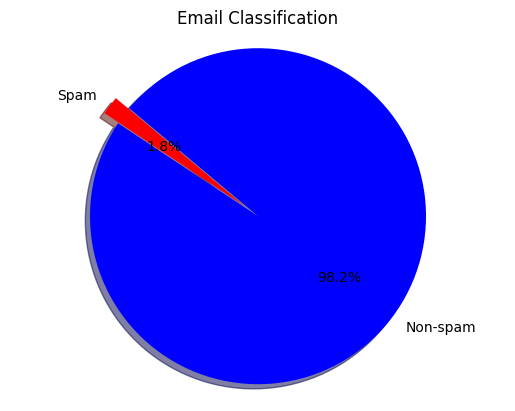

In [24]:
import matplotlib.pyplot as plt
spam_percent = (spam_count / total_emails) * 100
non_spam_percent = (non_spam_count / total_emails) * 100
labels = 'Spam', 'Non-spam'
sizes = [spam_percent, non_spam_percent]
colors = ['red', 'blue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Email Classification')
plt.show()